# Exercise 2: Live shared task

The challenge is to build a sentence-level classifier for identyfing [adverse drug events](https://en.wikipedia.org/wiki/Adverse_event) in 60 minutes. You are free to use any data and annotation strategy you think best trades off hacking and labelling. Just please don't look at the test data.

Some strategies to consider:
* Get started with random or query-driven sampling.
* Use the dev data for seeding learning instead of generalisation testing and analysis.
* Tune classifier choice, hyperparameters or feature extraction.
* Use error analysis over the dev data to refine your strategy.
* Active learning by uncertainty or ensembles.
* Collect 10 or more query functions and use as snorkel labelling functions.
* Find additional data, e.g., [Twitter](https://archive.org/details/twitterstream).
* Interactive web search or [Reddit queries](http://minimaxir.com/2015/10/reddit-bigquery/).
* Use external data (e.g., [MAUDE](https://www.fda.gov/MedicalDevices/DeviceRegulationandGuidance/PostmarketRequirements/ReportingAdverseEvents/ucm127891.htm)) for querying or labelling functions.

Please don't use data from the following as they are sources of our held-out data:
* CSIRO CADEC data set
* AskaPatient
* DIEGO Lab Twitter data sets

## Preliminaries

Labels are saved on the following objects. Only run this once, unless you want delete your annotations and start over.

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# for tracking performance
batches = []

In [3]:
from dataset import Dataset

# load dev data
dev = Dataset.from_csv('../shared-task/dev.csv')
print('Loaded {} items to dev dataset'.format(len(dev)))

# get text and label vectors for scikit-learn
X_dev, y_dev = zip(*dev.oracle_items)

Loaded 3761 items to dev dataset


In [11]:
# load unlabelled data pools
aska = Dataset.from_csv('../shared-task/aska.csv')
print('Loaded {} items to aska dataset'.format(len(aska)))

#ader = Dataset.from_csv('../shared-task/ader.csv')
#print('Loaded {} items to ader dataset'.format(len(ader)))

#adeb = Dataset.from_csv('../shared-task/adeb.csv')
#print('Loaded {} items to adeb dataset'.format(len(adeb)))

adrc = Dataset.from_csv('../shared-task/adrc.csv')
print('Loaded {} items to adrc dataset'.format(len(adrc)))

DATASETS = [aska, adrc]

## Look at some dev data

In [24]:
for i, (text, label) in enumerate(dev.oracle_items):
    if i > 9:
        break
    print(i, label, repr(text))

0 False 'I even questioned her about the liver damage it can cause but she said it hardly ever happens.'
1 True 'After I stopped taking Lipitor, the pain gradually subsided over a 9 month period.'
2 False 'Oh yeah, Hyprochondria!'
3 True 'pain in my left leg and most of my joints.'
4 False 'not worth the risks of taking the drug.'
5 False 'Thought I would take lipitor just to be safe.'
6 False 'It worked very well the first time it was prescribed and I lost 20 pounds using it with exercise and diet.'
7 True 'When the weather is hot we both get extreme headaches.'
8 False 'I stop treatment and went to an over-the-counter med.'
9 False 'i feel its ok.'


## Look at some unlabelled pool data

In [25]:
for i, (text, label) in enumerate(aska.oracle_items):
    if i > 9:
        break
    print(i, label, repr(text))

0 None 'Have not had need to take xanax since starting'
1 None 'What a nightmare drug for me!'
2 None 'I was on it for 3 1/2 yrs.'
3 None "Explained to the doctor it wasn't helping to begin with 1 month after taking it so upped the dose on me and its done nothing to really help pick me up at all."
4 None 'DOCTORS SAY THERE ARE NO SIDE EFFECTS,BUT THAT DOESNT SEEM TO BE THE CASE.'
5 None 'in my third week now, the headaches are gone or at least more manageable when i have them, my teeth grinding/jaw clenching is getting better, i actually HAVE energy to do things again (!!'
6 None 'Cymbalta makes me feel good.'
7 None 'I only took this for 2 weeks after years of taking aciphex with no ill effetcs(I had to start Nexium because I am active duty military and they switched from aciphex to nexium)my side effects have actually gotten worse in some cases.'
8 None "I can't believe they are putting people on this after a surgery...mastectomy...!!!"
9 None "I was super dizzy for weeks, didn't fee

## Load pool data

Now let's load the unlabelled pool data. We have data from several sources:
* `aska` - Posts for additional drugs from AskaPatient
* `ader` - Comments mentioning the same drugs from Reddit
* `adeb` - Tweets mentioning the same set of drugs
* `adrc` - Tweets mentioning an overlapping set of drugs

## Annotate

In [17]:
from samplers import Random
import re

# set up a random sampler with a query filter that mathces examples containing the word pain
def mentions_pain(item):
    return bool(re.search(r'\bpain\b', item[0], flags=re.IGNORECASE))
query_sampler = Random(None, batch_size=10, query=mentions_pain)

# sample 
for i, (text, label) in enumerate(query_sampler(aska)):
    print(i, label, repr(text[:80]))

0 None 'EYE pain, to where I had to wear sunglasses in the house, dim lights, close blin'
1 None 'It helped me to feel better andhelped my pain a lot'
2 None 'Im having terrible pain and facing expensive cost to have them repaired or repla'
3 None 'My joint, muscle pain is so severe I have to actually crawl up my steps to my ho'
4 None 'it helps but still have stomach acid and pain'
5 None 'Also gastritis pain went away.'
6 None 'This med is the only med that relieves the pain & numbness of neuropathy for me.'
7 None 'Never noticed any reduction in my pain level.'
8 None 'Never had a problem and never had a pain once I stopped taking it.'
9 None 'While there has been some pain relief the side effects are more than I care to d'


In [41]:
from annotator import AnnotationPane

# annotate
pane = AnnotationPane(aska, query_sampler)

VBox(children=(HBox(children=(Button(description='Yes', style=ButtonStyle()), Button(description='No', style=ButtonStyle()), Button(description='Skip', style=ButtonStyle()))), HTML(value='<p>I just started taking this drug a few weeks ago, so it might begin to affect my flare-ups, but for now I still feel the flareup pain.</p>')))

In [42]:
aska.label_distribution

{False: 27, None: 14668, True: 17}

## Train on annotated data, evaluate on dev data

In [ ]:
# TODO update train (copy from submissions/wradford)

In [43]:
from evaluation import fit_and_score

batches.append(list(fit_and_score(pipeline, aska, X_test, y_test, n=5)))

..fitting to 44 labelled examples..
..fitting to 44 labelled examples..
..fitting to 44 labelled examples..
..fitting to 44 labelled examples..
..fitting to 44 labelled examples..


In [49]:
# inspect batches
print('Batches:')
for i, batch in enumerate(batches):
    train_sizes, train_scores, test_scores = zip(*batch)
    print('\n..batch', i)
    print('..train_sizes:', train_sizes)
    print('..train_scores:', ['{:.2f}'.format(s) for s in train_scores])
    print('..test_scores:', ['{:.2f}'.format(s) for s in test_scores])

Batches:

..batch 0
..train_sizes: (30, 30, 30, 30, 30)
..train_scores: ['1.00', '1.00', '1.00', '1.00', '1.00']
..test_scores: ['0.45', '0.49', '0.52', '0.49', '0.52']

..batch 1
..train_sizes: (44, 44, 44, 44, 44)
..train_scores: ['1.00', '1.00', '1.00', '1.00', '1.00']
..test_scores: ['0.43', '0.47', '0.47', '0.47', '0.49']


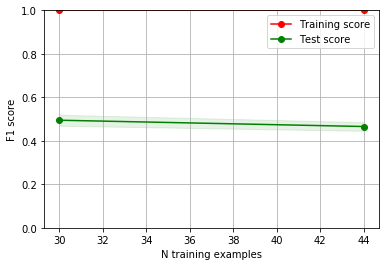

In [46]:
from evaluation import plot_learning_curve

train_sizes, train_scores, test_scores = zip(*[zip(*i) for i in batches])
plt = plot_learning_curve(train_sizes, train_scores, test_scores)
plt.show()

## Train and evaluate on dev

In [ ]:
from samplers import Random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import re

# use multinomial NB again
pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')),
        ('clf', MultinomialNB(alpha=.01)),
    ])

## Data programming 

One view of data programming is that it takes the query functions we used in the previous exercise and uses them for weak supervision. It does this by pooling labelling function output using weighted voting.

A simple implementation could use the inter-annotator agreement scripts from exercise 1.1 to weight each labelling function by its average agreement score.

In the setting here, where we have dev data, we could also weight each labelling function by its perforamance on the labelled dev data. Of course, this wouldn't work in an annotation setting where we were starting without labelled data.

A key difference with `snorkel` is that this approach in the annotation framework does not go on to train the classifier on a continuous voting confidence value.

Feel free to experiment with voting, or use `snorkel` directly. If you do plan to use `snorkel`, note that it takes a while to [install](https://github.com/HazyResearch/snorkel#installation). It would be a good idea to run the installation in the background while you start annotating and/or writing labelling functions.

Once `snorkel` is installed, the tutorials should help get things up and running. These are in the repo and can also be viewed [on github](https://github.com/HazyResearch/snorkel/tree/master/tutorials/intro).

# Wrapping up..

## Short strategy description

Before submitting, please summarise:
* The hacking/labelling strategy you followed
* How do you rate this strategy? Why?

__TODO Add your summary right here.__

__TODO If you have a list sampling strategies, please include it here.__

## Submission

Submit your annotation and system output for scoring.
* Union of annotations across all sets (except dev).
* Predict dev
* Predict test


### Step 1: Set up

First, we'll set up a pipeline. Feel free to use a different classifier here if you like.

__FIXME fix to_csv!__

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# use multinomial NB again
pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')),
        ('clf', MultinomialNB(alpha=.01)),
    ])

Submissions will be written to a USERNAME directory. This will take USER from your environment by default, but feel free to choose another name.

In [51]:
import os

USERNAME = os.environ.get('USER', 'username')

In [53]:
! mkdir -p ../submissions/$USER

### Step 2: Train and predict

Now lets collate all annotated data into a `train` dataset; use this to train the classifier; and save predictions for dev and test.

__FIXME move this into a function for learning curve use as well!__

In [54]:
# Collate all labels.
train = Dataset()
# FIXME Add all the datasets.
for d in DATASETS:
    train.update(d)
print(train.label_distribution)

{None: 14668, False: 27, True: 17}


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...ue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [ ]:
# save annotations to csv
for d in DATASETS:
    d.to_csv('../submissions/YOUR_USERNAME_HERE/pool.csv')
train.to_csv('../submissions/{}/train.csv'.format(USERNAME))

In [ ]:
# train the classifier
X_train, y_train = zip(*train.labelled_items)
pipeline.fit(X_train, y_train)

In [57]:
from evaluation import label_for_submission

# prepare system output for dev data
label_for_submission(dev, pipeline, 'dev', USERNAME)

# prepare system output for test data
test = Dataset.from_csv('../shared-task/test.csv')
label_for_submission(test, pipeline, 'test', USERNAME)

Written submission to ../submissions/benhachey/dev.csv
Written submission to ../submissions/benhachey/test.csv


### Step 3: Copy notebook and submit

In [ ]:
# copy your notebook to your submission directory
! cp exercise_2.ipynb ../submissions/YOUR_USERNAME_HERE/

In [ ]:
# push your submission back to the repo
! git add ../submissions/YOUR_USERNAME_HERE
! git commit -m 'Checkpoint YOUR_USERNAME_HERE' ../submissions/YOUR_USERNAME_HERE/
! git push